In [1]:
#user_id:用户id，order_date:购买日期,order_products:购买数量,order_amount:购买金额
#数据时间：1997.1-1998.6

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot') #更改绘制风格,选用R语言绘图库风格
plt.rcParams['font.sans-serif']=['Simhei']#设置中文显示

In [3]:
#导入数据
colums = ['user_id','order_date','order_products','order_amount']
df = pd.read_table('D:/桌面/资料/用户消费行为分析/CDNOW_master.txt',names=colums,sep='\s+')
#sep:''\s+''匹配任意个空格
df.head()
#1.日期格式需要转换；2.存在同一个用户一天内购买多次的行为；

,user_id,order_date,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.describe()
#1.用户平均每笔订单购买2.4个商品，标准差2.3，波动属于正常范围
#但是75%分位数的数字，说明大多数的订单购买数量不多，围绕在2-3个产品
#2.购买金额反应出大部分订单消费金额都在中小额度，30-40左右

,user_id,order_date,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_date      69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


### 数据预处理

In [6]:
df['order_dt'] = pd.to_datetime(df['order_date'],format='%Y%m%d')
#format参数：按照指定的格式匹配需要转换的参数列
#%Y：年份1994    %m：两位月份05   %d：两位日期   
#%y：两位年份 94    %h：两位小时   %M：两位分钟 15   %s：两位秒


#将order_dt这一列转换为精度为月份的数据列
df['month'] = df['order_dt'].astype('datetime64[M]') 
#[M]:控制转换后的精度，只能看到具体的月份，具体是哪天不清楚。这和读取日期的月份不同
df.head()


,user_id,order_date,order_products,order_amount,order_dt,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


Text(0.5, 1.0, '每月的消费人数')

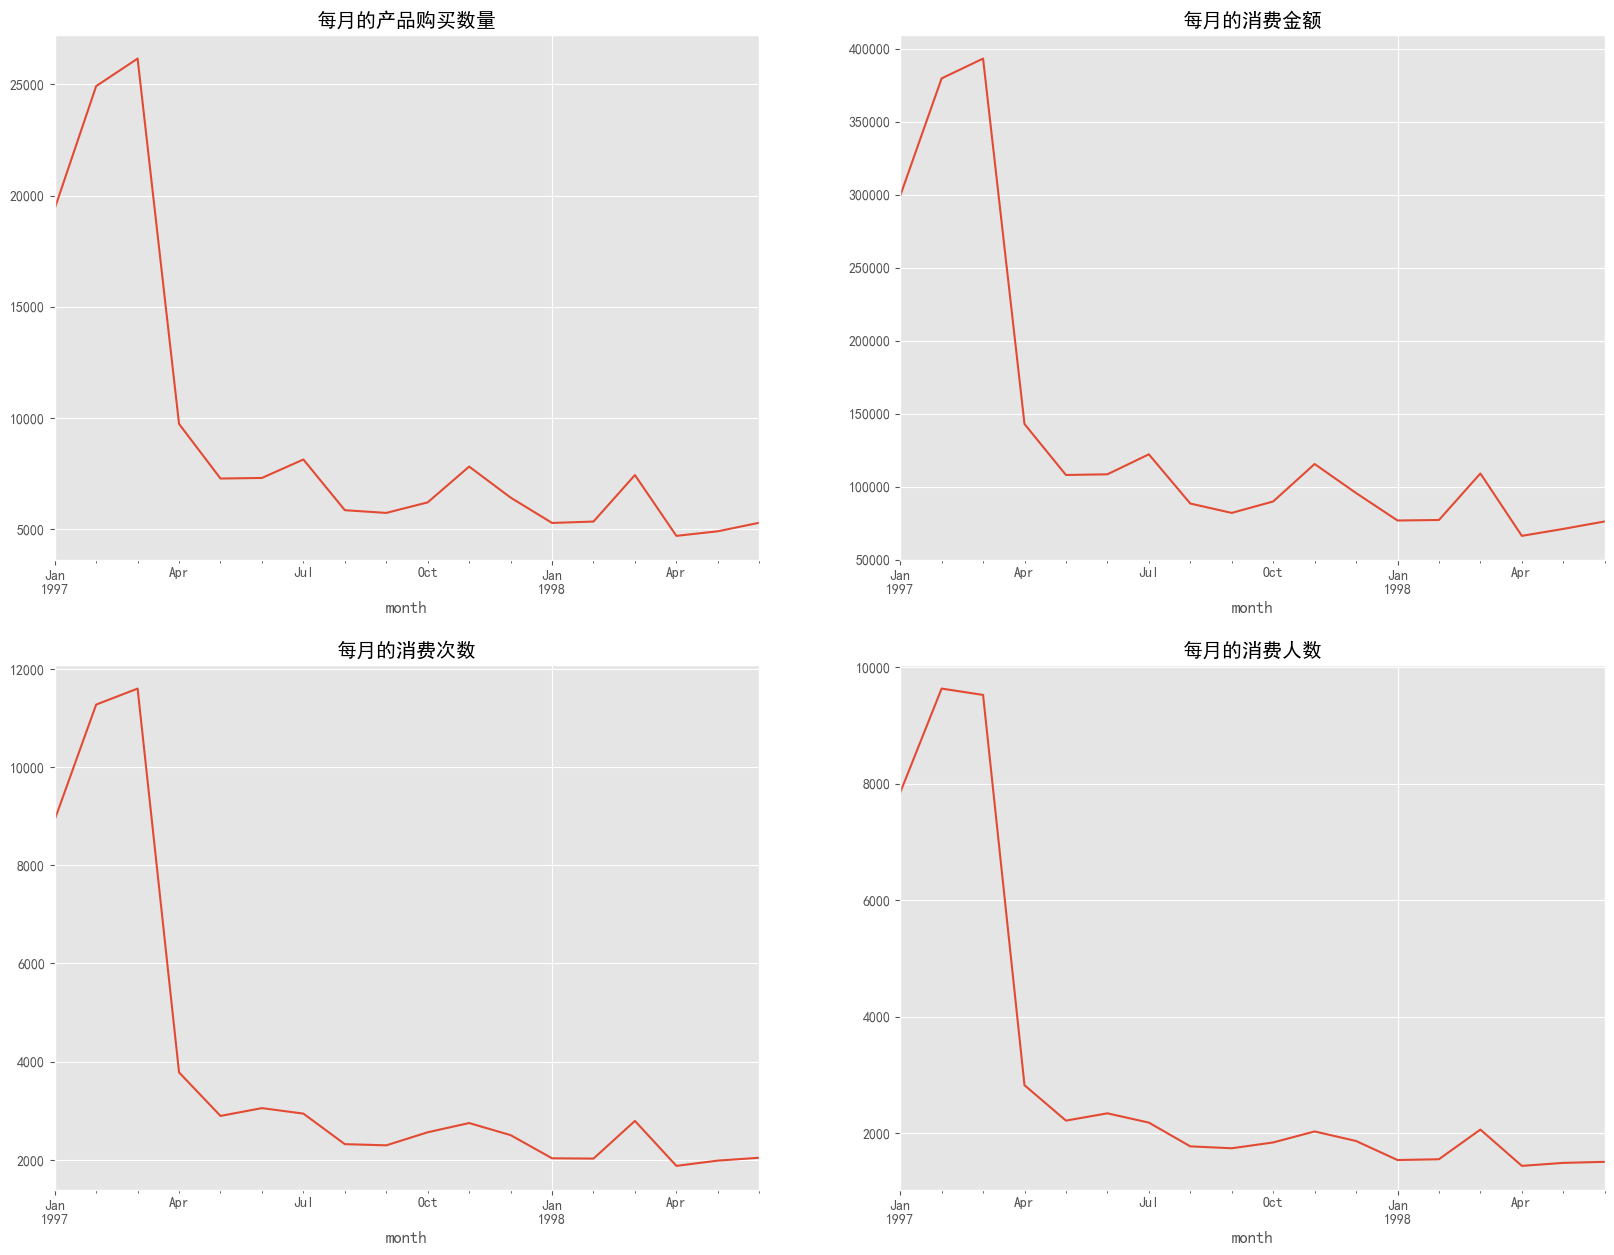

In [7]:
#用户整体消费趋势（按月份 ）
#按月份统计消费情况:产品购买数量、消费金额、消费次数、消费人数
plt.figure(figsize=(20,15))#单位是英寸。创建图形窗口
#每月的产品购买数量
plt.subplot(221)
#在这个窗口中设置一个 2 行 2 列的子图布局，并占据第一个图
df.groupby(by='month')['order_products'].sum().plot()#默认折线图
plt.title('每月的产品购买数量')

#每月的消费金额
plt.subplot(222)

df.groupby(by='month')['order_amount'].sum().plot()#默认折线图
plt.title('每月的消费金额')

#每月的消费次数
plt.subplot(223)

df.groupby(by='month')['user_id'].count().plot()#默认折线图
plt.title('每月的消费次数')

#每月的消费人数（对user_id进行去重统计）
plt.subplot(224)
df.groupby(by='month')['user_id'].nunique().plot()
plt.title('每月的消费人数')

#分析结果：图一：前三个月销量很高，而之后销量较为稳定，呈下降趋势
#图二可以看出：前三个月，消费金额与图一的购买数量成正比例关系，前三个月后下降严重，呈下降趋势。
#可能原因：1.月份处于春节前后 2.公司是否加大营销力度
#图三可以看出：前三个月订单数在一万左右，之后的订单数在2500左右
#图四：前三个月消费人数在8000-10000左右，之后的消费人数在2000左右
#总结：所有数据显示，97年前三个月消费事态异常，后续趋于常态化。

### 用户个体消费分析

In [8]:
#1.用户消费金额，消费次数（产品数量）描述统计
user_grouped = df.groupby(by='user_id').sum()
print(user_grouped.describe())
print('用户数量：',len(user_grouped))

#从用户的角度：用户数为23570个，每个用户平均购买7个CD，中位数为3，最大值1033，平均值大于中位数是典型的右偏分布.
#从消费金额角度：平均消费金额大于中位数，属于典型的右偏分布

         order_date  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
用户数量： 23570


<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

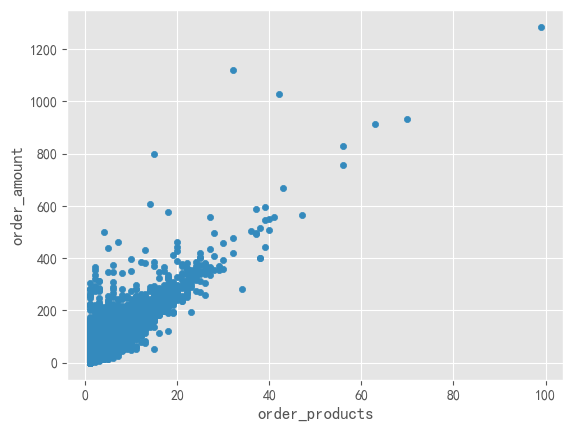

In [9]:
#2.绘制产品购买量与消费金额散点图

df.plot(kind='scatter',x='order_products',y='order_amount')

#从图中可知：用户的消费金额与购买量呈现线性趋势，可以看出每个商品的均价15左右
#订单的极值点比较少（消费金额>1000，或者购买数>60），对于样本来说影响不大，可以忽略不计

### 用户消费分布图

<AxesSubplot:xlabel='每个user_id购买数量', ylabel='Frequency'>

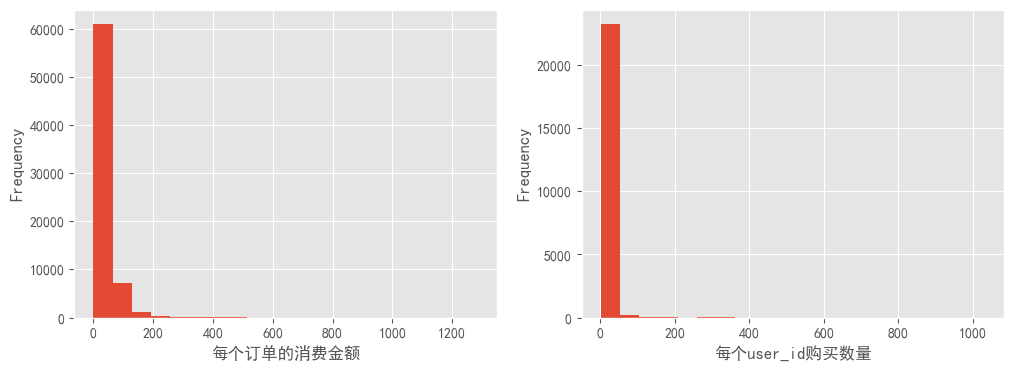

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('每个订单的消费金额')

df['order_amount'].plot(kind='hist',bins=20)#绘制直方图，bins：区间分数，影响柱子的宽度，宽度=（列最大值-最小值）/bins
#图一可知消费金额在100以内占据了大部分

plt.subplot(122)
plt.xlabel('每个user_id购买数量')
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist',bins=20)

#图二可知每个用户购买数量比较小，集中在50以内

#总结：我们的用户主要是消费金额低并且购买量小于50的用户（在电商领域是正常现象）

### 用户累积消费金额占比分析（用户的贡献度）

In [11]:
#进行用户分组，取出用户消费金额（进行求和分组），最后进行排序,重置索引

user_cumsum = df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()#记得充值索引

user_cumsum

,user_id,order_amount
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [12]:
#每个用户消费金额累加，使用累加器
user_cumsum['amount_cumsum'] = user_cumsum['order_amount'].cumsum()

user_cumsum.tail()

,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [13]:
#贡献率
amount_total = user_cumsum['amount_cumsum'].max()#消费金额总值
user_cumsum['prop'] = user_cumsum.apply(lambda x : x['amount_cumsum']/amount_total,axis = 1)
user_cumsum.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


<AxesSubplot:>

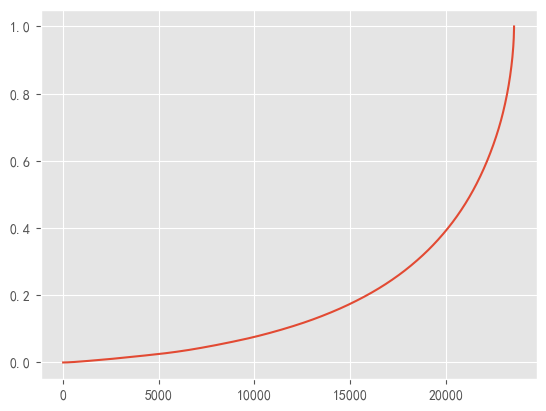

In [14]:
user_cumsum['prop'].plot()

#由图可知，前两万名用户贡献总金额的40%，剩下的3500名用户贡献了60%（二八原则）

### 用户消费行为 

<AxesSubplot:>

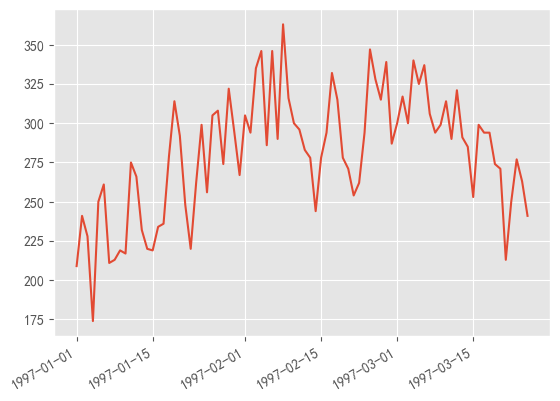

In [15]:
#首购时间：用户分组，取时间最小值
df.groupby(by='user_id')['order_dt'].min().value_counts().plot()
#由图可知，首次购买的用户量在1.1-2.10呈现明显上升趋势，后续逐步下降。
#猜测：公司产品推广力度/价格的调整导致

<AxesSubplot:>

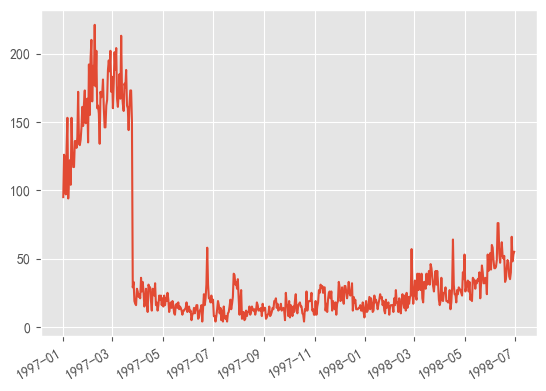

In [16]:
# 最后一次时间：用户分组，取时间最大值
df.groupby(by='user_id')['order_dt'].max().value_counts().plot()

#绝大多数用户最后一次购买时间集中在前三个月：说明缺少忠诚用户
#随着时间推移，最后一次购买商品的用户量呈现上升趋势。猜测：这份数据选择的是前三个月消费的用户在后面十八个月的跟踪记录

## 用户分层

### 1.构建用户分层模型

In [17]:
#透视表的使用：（index：相当于groupby，values：取出的数据列，aggfunc：key值必须存在于values列中，并且必须跟随有效的聚合函数）
rfm = df.pivot_table(index = 'user_id',
                    values=['order_products','order_amount','order_dt'],
                    aggfunc={
                        'order_dt' : 'max',#最后一次购买时间
                        'order_products' : 'sum' ,#购买商品总数量
                        'order_amount' : 'sum'  #消费总金额
                    })

rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [18]:
rfm['R'] = -(rfm['order_dt'] - rfm['order_dt'].max())/np.timedelta64(1,'D')
#取相差的天数，保留一位小数
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [23]:
# RFM计算方式：每一列数据-数据所在列的平均值，有正有负，根据结果值与1作比较，>=1，设置为1，否则为0
def rfm_func(x):  #x:分别代表每一列的数据
    level =  x.apply(lambda x:'1' if x>=1 else '0')
    label = level['R']+level['F']+level['M']#字符串拼接:100/001
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留值客户'
    }
    result = d[label]
    return result

rfm['label'] = rfm[['R','F','M']].apply(lambda x : x-x.mean()).apply(rfm_func,axis = 1)
rfm.head()

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留值客户
5,385.61,1998-01-03,29,178.0,重要保持客户


Text(0, 0.5, 'R')

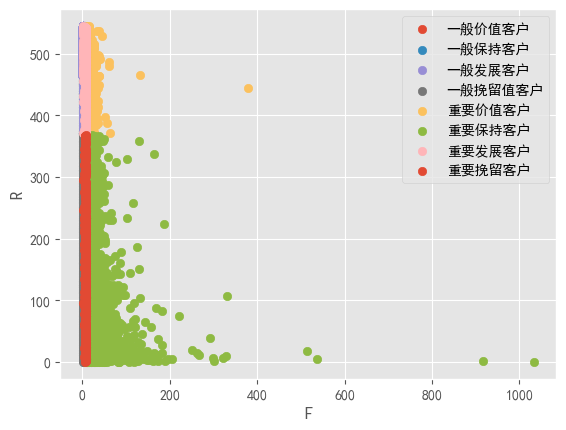

In [26]:
#客户分层可视化
for label,grouped in rfm.groupby(by = 'label'):
    x = grouped['F']
    y = grouped['R']
    plt.scatter(x,y,label=label)
    
plt.legend() #显示图例
plt.xlabel('F')
plt.ylabel('R')

## 新老、活跃、回流用户分析
### 1.新用户：第一次消费；不活跃：时间窗口内没有消费过的老客户
### 2.回流用户：回头客；用户回流动作可以分为自主回流（用户自己回流）与人工回流（人工参与导致）。

In [28]:
#用户分层数据，使用透视表
pivoted_counts = df.pivot_table(index='user_id',
                               columns='month',
                               values = 'order_dt',
                               aggfunc = 'count').fillna(0)#没有消费变为0
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#由于浮点数不直观，并且需要转成是否消费过，用0/1表示

df_purchase = pivoted_counts.applymap(lambda x:1  if x >=1 else 0)


#apply:作用dataframe数据中的一整行或者一整列
#applymap：作用于dataframe数据中的每一个元素
#map:本身是一个series函数，在dataframe中无法使用。作用于series中每一个元素

df_purchase

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# 判断：新用户、活跃用户、不活跃用户、回流用户
def active_status(data):  # 整行数据，共18列
    status = []  # 负责存储18个月的状态
    for i in range(18):
        # 本月没有消费
        if data[i] == 0:
            if len(status) == 0:  # 之前没有记录
                status.append('unreg')  # 未注册状态
            else:  # 判断上一个月状态
                if status[i - 1] == 'unreg':  # 一直没有消费过
                    status.append('unreg')
                else:  # new/active/unactive/return中的一个状态
                    status.append('unactive')  # 不活跃状态
        # 本月有消费
        else:
            if len(status) == 0:  # 之前没有记录
                status.append('new')  # 第一次消费
            else:
                if status[i - 1] == 'unactive':
                    status.append('return')  # 回流状态
                elif status[i - 1] == 'unreg':
                    status.append('new')  # 新用户
                else:  # new/active/return状态之一
                    status.append('active')
    return pd.Series(status, df_purchase.columns)  # 值：status，列名：df_purchase中的列名


# 应用函数到每一行
purchase_status = df_purchase.apply(active_status, axis=1)
purchase_status.head()


month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [38]:
#用Nan替换unreg
purchase_status_ct = purchase_status.replace('unreg',np.NaN).apply(lambda x :pd.value_counts(x))
purchase_status_ct

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<AxesSubplot:xlabel='month'>

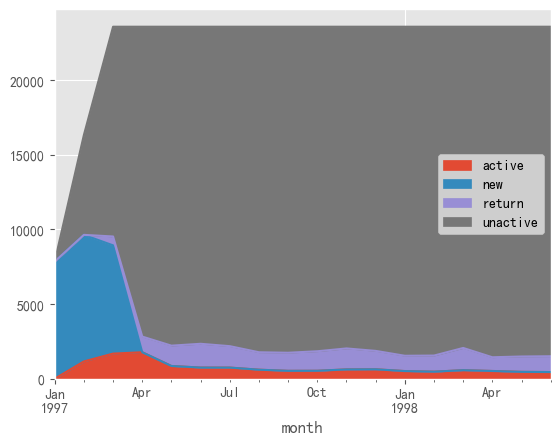

In [39]:
purchase_status_ct.T.fillna(0).plot.area() #行列变换，堆叠面积图
#由图可知，前三个月活跃用户和新用户,占比比较大；四月份过后，新用户和活跃用户开始下降，并开始呈现稳定趋势
#回流用户主要产生在四月后，呈现稳定趋势，是网站的重要客户

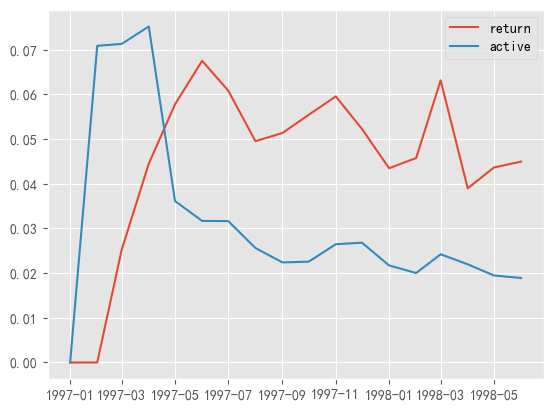

In [44]:
#回流用户、活跃用户占比
rate = purchase_status_ct.T.fillna(0).apply(lambda x:  x/x.sum() ,axis = 1)
plt.plot(rate['return'],label = 'return')
plt.plot(rate['active'],label = 'active')

plt.legend()

#回流用户：前五个月上涨，过后呈现下降趋势，平均维持在百分之五比例。
#活跃用户：前三月大量增长，猜测由于活动，5月份后开始下降，平均维持在2.5%左右
#网站运营稳定后，回流用户占比大于活跃用户

## 用户购买周期

In [48]:
#shift函数：根据指定的步长将数据向前（下移）或向后（上移）移动。移动时，原有位置会被 NaN 填充。
#计算购买周期（购买日期的时间差）

order_diff = df.groupby('user_id').apply(lambda x: x['order_dt']-x['order_dt'].shift())
#当前订单日期-上一次订单日期
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_dt, dtype: object

<AxesSubplot:>

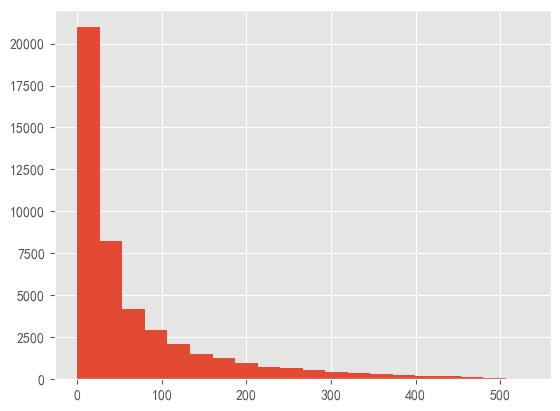

In [49]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)
#可知平均消费周期为68天，绝大多数用户低于100天，呈现典型的长尾分布。只有小部分用户消费周期在200天以上（不积极消费用户）
#可以在不积极用户消费后，进行电话回访等活动，增大消费频率。

### 用户生命周期

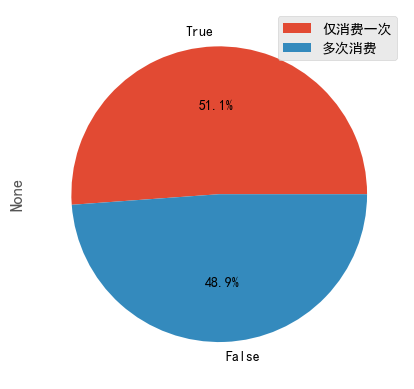

In [55]:
#用户最后一个购买-第一次购买日期 
user_life = df.groupby('user_id')['order_dt'].agg(['min','max'])
# agg:agg() 函数用于对分组数据应用多个聚合函数，支持许多常用的聚合操作，如 sum、mean、count、min、max
(user_life['max'] == user_life['min']).value_counts().plot.pie(autopct = '%1.1f%%')#格式化成1位小数
plt.legend(['仅消费一次','多次消费'])

In [56]:
(user_life['max'] - user_life['min']).describe() #生命周期

#用户平均生命周期位134天，但是中位数是0，再次验证大多数用户只消费了一次（低质量用户）
#75%分位数以后的用户，生命周期>294天，属于核心用户，需要着重维持。
#前三个月的新用户数据，所以分析的是这些新用户的生命周期

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

Text(0, 0.5, '用户人数')

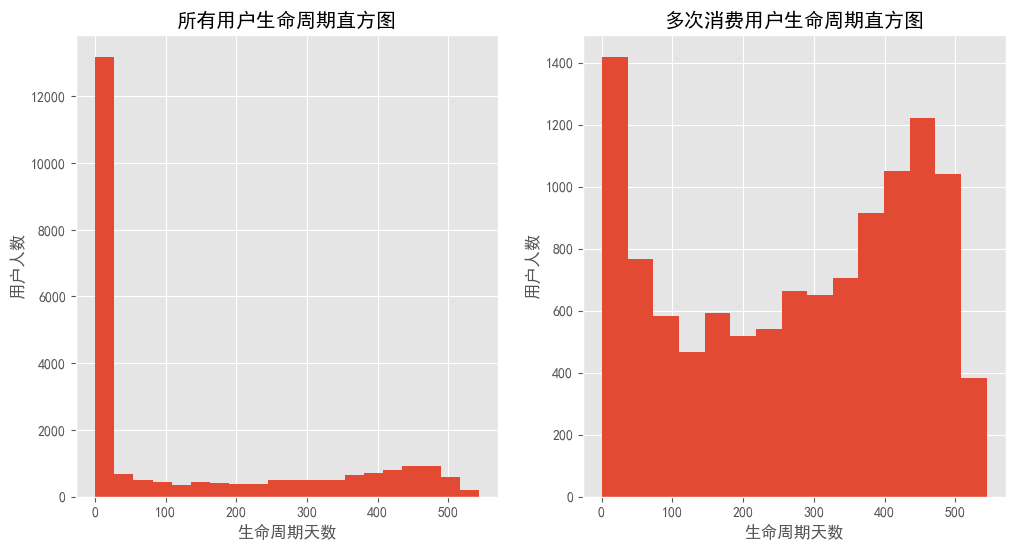

In [65]:
#绘制所有用户生命周期直方图+多次消费

plt.figure(figsize=(12,6))
plt.subplot(121)

((user_life['max'] - user_life['min'])/np.timedelta64(1,'D')).hist(bins = 20)
plt.title('所有用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

plt.subplot(122)

u_l = (user_life['max'] - user_life['min']).reset_index()[0]/np.timedelta64(1,'D')
u_l[u_l>0].hist(bins = 15)
plt.title('多次消费用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')
#由图可知，图二过滤掉了生命周期==0的用户，呈现双峰结构。

##  用户复购率和回购率分析

<AxesSubplot:xlabel='month'>

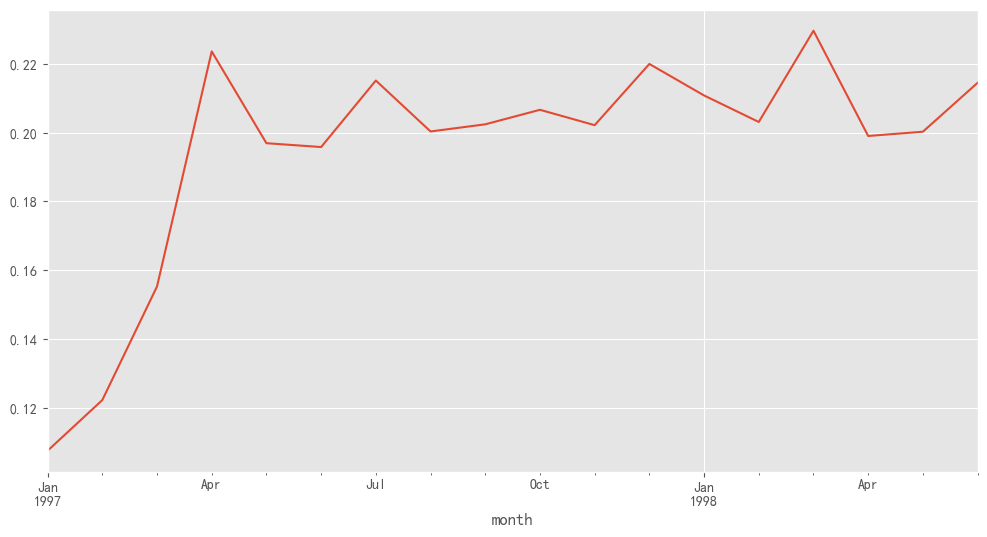

In [68]:
#复购率：在自然月内，购买多次的用户在总消费人数中的占比
#消费者分类：消费记录>=2次 ，消费一次，无消费
purchase_r = pivoted_counts.applymap(lambda x : 1  if x>1else np.NaN if x == 0 else 0) #复购用户用1表示，非复购用0，没有消费用NAN
purchase_r.head()
#复购用户比例
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6))
#前三个月复购率上升，但后续平稳在20%~22%左右。猜测原因：大批新用户仅仅购买一次

In [72]:
# 回购率函数
def purchase_back(data):
    status = []  # 存储用户回购状态
    # 1: 回购用户，0: 非回购用户（当前月份消费，下个月未消费），NaN: 当前月份未消费
    for i in range(17):  # 因为有18列数据，最后一列没有下个月，所以遍历到倒数第二个月
        if data[i] == 1:  # 当前月份是否消费
            if data[i + 1] == 1:  # 下个月是否消费
                status.append(1)  # 回购用户
            elif data[i + 1] == 0:
                status.append(0)  # 下个月未消费
            else:
                status.append(np.NaN)  # 下个月没有记录
        else:
            status.append(np.NaN)  # 当前月份未消费

    status.append(np.NaN)  # 最后一列没有下个月的数据
    return pd.Series(status, index=df_purchase.columns)  # 确保返回的数据列与原数据的列数一致

purchase_b = df_purchase.apply(purchase_back, axis=1)  # 对每个用户（行）应用回购率计算
purchase_b.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


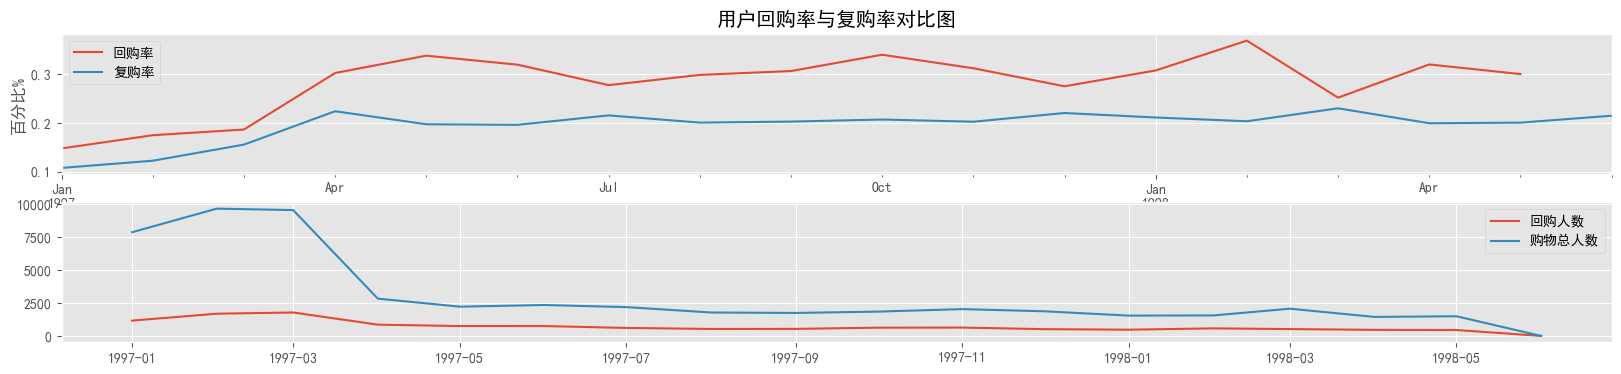

In [78]:
#回购率可视化
plt.figure(figsize=(20,4))

plt.subplot(211)

(purchase_b.sum()/purchase_b.count()).plot(label = '回购率')
#plt.subplot(212)
(purchase_r.sum()/purchase_r.count()).plot(label='复购率')
plt.legend()
plt.ylabel('百分比%')
plt.title('用户回购率与复购率对比图')
#回购率平稳在30%左右，波动性较大
#复购率低于回购率，平稳在20%左右，波动性较小
#前三个月两个比率都呈现上升趋势，说明新用户需要一定时间来变成复购/回购用户

#回购人数与购物总人数对比
plt.subplot(212)
plt.plot(purchase_b.sum(),label='回购人数')
plt.plot(purchase_b.count(),label='购物总人数')
plt.legend()

#前三个月购物总人数远远大于回购人数